In [ ]:
# import general packages
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

from scipy.interpolate import interp1d
from scipy.optimize import brentq

import h5py
import json
import os
from datetime import datetime

import pde
import phasesep_pyrenoid as ph
from phasesep_pyrenoid.helper_functions import cmap_exp, cmap_orange, dark_orange, colors, colors_exp, scale_length, dt_length, add_scalebar, add_timenote
from phasesep_pyrenoid.solvers_simulations import solve_stokes_flow, run_simulation
from droplets import DiffuseDroplet, Emulsion, SphericalDroplet


FOLDER_RESULTS = "./simulation_results/Paper/"
FOLDER_FIGURES= FOLDER_RESULTS+"figures_for_paper/"

This code produces the plot of the Stokes flow velocity and pressure for Fig 2

In [2]:
params_advection = {
        "nx": 83, # Grid size x
        "ny": 83, # Grid size y
        "Lx":40.0, # Domain size x
        "Ly":40.0, # Domain size y
        "mu": 40, # Dynamic viscosity
        "eta": 12.5, # Damping
        "P0": 10, # Max of gaussian pressure
        "sigma_P" : 1.2, # Width of gaussian pressure
    }

P, u, x, y, X, Y = solve_stokes_flow(**params_advection)

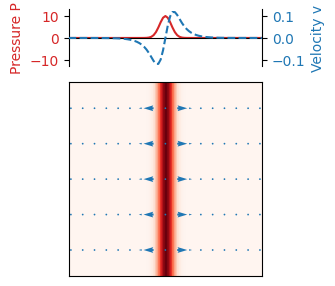

In [8]:
###### PLOT FOR FIGURE 1
# Subsample for quiver
arr_dist = 5
arr_dist2 = 15
H, W = X.shape
center_i, center_j = H // 2, W // 2
i_start, j_start = center_i % arr_dist, center_j % arr_dist2
i_indices = np.arange(i_start, H, arr_dist)
j_indices = np.arange(j_start, W, arr_dist2)
I, J = np.meshgrid(i_indices, j_indices, indexing="ij")
v = np.zeros_like(u)
X_q, Y_q = X[I, J], Y[I, J]
u_q, v_q = u[I, J], v[I, J]

# Create figure with controlled layout
fig = plt.figure(figsize=(2.5, 3.5))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 7], hspace=0.1)

# Top: Pressure and velocity on same x-axis
ax1 = fig.add_subplot(gs[0])
y1 = P[:, 41]
y2 = u[:, 41]
press_color = "tab:red"
velo_color = "tab:blue"

# Plot pressure
ax1.plot(x, y1, color=press_color, label='Pressure P')
ax1.set_ylabel('Pressure P', color=press_color)
ax1.tick_params(axis='y', labelcolor=press_color)
ax1.set_ylim([-1.3 * max(abs(y1)), 1.3 * max(abs(y1))])
# Adjust spines for Cartesian style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position('zero')  # Optional: move y=0 axis to the left
ax1.spines['bottom'].set_position('zero')  # Move x-axis to y=0
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

ax2 = ax1.twinx()
ax2.plot(x, y2, linestyle='--', color=velo_color)
ax2.set_ylabel("Velocity v", color=velo_color)
ax2.tick_params(axis='y', labelcolor=velo_color)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax1.set_xticks([])

# Bottom: imshow and quiver
ax3 = fig.add_subplot(gs[1], sharex=ax1)
im = ax3.imshow(np.transpose(P), extent=[0, params_advection["Lx"], 0, params_advection["Ly"]], origin="lower", cmap="Reds", alpha=1, aspect='equal')
qv = ax3.quiver(X_q, Y_q, u_q, v_q, scale=2, color="tab:blue", width=0.01)
# ax3.set_xlabel("X")
# ax3.set_ylabel("Y")
ax3.set_yticks([])
#ax3.set_xticks([0,0.5,1])

# Colorbar for imshow
#cbar = plt.colorbar(im, ax=ax3, label="Pressure", pad=0.01)

#plt.tight_layout()
plt.savefig(FOLDER_FIGURES+"pressure_velocity.svg", bbox_inches='tight')
plt.show()
